# Sentiment Analysis 

** Here we are doing sentiment analysis on Tripadvisor Hotel reviews using two different techniques:

1) VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach

2) Roberta Pretrained Model from Hugging face

** We will be able to go through their comparison too

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [3]:
df = pd.read_csv("D:/py/tripadvisor_hotel_reviews.csv")
print(df.shape)
df = df.head(500)
print(df.shape)

(20491, 3)
(500, 3)


In [4]:
df.head()

,Review,Rating,Id
0,nice hotel expensive parking got good deal sta...,4,1
1,ok nothing special charge diamond member hilto...,2,2
2,nice rooms not 4* experience hotel monaco seat...,3,3
3,"unique, great stay, wonderful time hotel monac...",5,4
4,"great stay great stay, went seahawk game aweso...",5,5


### Quick EDA

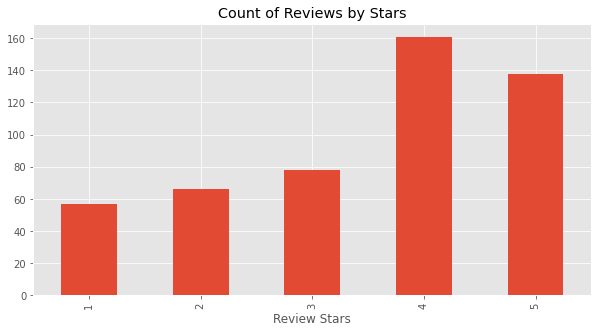

In [5]:
ax = df['Rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

### Basic NLTK

In [6]:
example = df['Review'][50]
print(example)

excellent way stayed inn market memorial day weekend, room large great view water sure request way advance, hotel quiet fully booked crowded, service impeccable staff well-mannered friendly, ca n't fault anything.it great location right pike place market near lots great restaurants like etta chez shea,  


In [7]:
Tokens = nltk.word_tokenize(example)
Tokens[:10]

['excellent',
 'way',
 'stayed',
 'inn',
 'market',
 'memorial',
 'day',
 'weekend',
 ',',
 'room']

In [8]:
tagged = nltk.pos_tag(Tokens)
tagged[:10]

[('excellent', 'JJ'),
 ('way', 'NN'),
 ('stayed', 'VBD'),
 ('inn', 'JJ'),
 ('market', 'NN'),
 ('memorial', 'JJ'),
 ('day', 'NN'),
 ('weekend', 'NN'),
 (',', ','),
 ('room', 'NN')]

In [9]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  excellent/JJ
  way/NN
  stayed/VBD
  inn/JJ
  market/NN
  memorial/JJ
  day/NN
  weekend/NN
  ,/,
  room/NN
  large/JJ
  great/JJ
  view/NN
  water/NN
  sure/JJ
  request/NN
  way/NN
  advance/NN
  ,/,
  hotel/NN
  quiet/JJ
  fully/RB
  booked/VBN
  crowded/VBN
  ,/,
  service/NN
  impeccable/JJ
  staff/NN
  well-mannered/JJ
  friendly/RB
  ,/,
  ca/MD
  n't/RB
  fault/VB
  anything.it/RB
  great/JJ
  location/NN
  right/RB
  pike/JJ
  place/NN
  market/NN
  near/IN
  lots/NNS
  great/JJ
  restaurants/NNS
  like/IN
  etta/NN
  chez/NN
  shea/NN
  ,/,)


## Step 1. VADER Seniment Scoring

We will use NLTK's `SentimentIntensityAnalyzer` to get the neg/neu/pos scores of the text.

- This uses a "bag of words" approach:
    1. Stop words are removed
    2. each word is scored and combined to a total score.

In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [11]:
sia.polarity_scores('Iam unhappy!')

{'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4753}

In [12]:
sia.polarity_scores('This is the best thing in my life ever!')

{'neg': 0.0, 'neu': 0.64, 'pos': 0.36, 'compound': 0.6696}

In [13]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.585, 'pos': 0.415, 'compound': 0.9782}

In [14]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    review = row['Review']
    myid = row['Id']
    res[myid]= sia.polarity_scores(review) 

  0%|          | 0/500 [00:00<?, ?it/s]

In [15]:
res

{1: {'neg': 0.072, 'neu': 0.643, 'pos': 0.285, 'compound': 0.9747},
 2: {'neg': 0.11, 'neu': 0.701, 'pos': 0.189, 'compound': 0.9787},
 3: {'neg': 0.081, 'neu': 0.7, 'pos': 0.219, 'compound': 0.9889},
 4: {'neg': 0.06, 'neu': 0.555, 'pos': 0.385, 'compound': 0.9912},
 5: {'neg': 0.135, 'neu': 0.643, 'pos': 0.221, 'compound': 0.9797},
 6: {'neg': 0.084, 'neu': 0.651, 'pos': 0.265, 'compound': 0.987},
 7: {'neg': 0.026, 'neu': 0.609, 'pos': 0.364, 'compound': 0.9925},
 8: {'neg': 0.032, 'neu': 0.74, 'pos': 0.228, 'compound': 0.959},
 9: {'neg': 0.038, 'neu': 0.663, 'pos': 0.298, 'compound': 0.9618},
 10: {'neg': 0.064, 'neu': 0.451, 'pos': 0.484, 'compound': 0.9756},
 11: {'neg': 0.08, 'neu': 0.524, 'pos': 0.395, 'compound': 0.9666},
 12: {'neg': 0.076, 'neu': 0.629, 'pos': 0.296, 'compound': 0.9242},
 13: {'neg': 0.075, 'neu': 0.551, 'pos': 0.374, 'compound': 0.9859},
 14: {'neg': 0.138, 'neu': 0.639, 'pos': 0.224, 'compound': 0.7584},
 15: {'neg': 0.051, 'neu': 0.467, 'pos': 0.482, 'co

In [16]:
pd.DataFrame(res).T

,neg,neu,pos,compound
1,0.072,0.643,0.285,0.9747
2,0.110,0.701,0.189,0.9787
3,0.081,0.700,0.219,0.9889
4,0.060,0.555,0.385,0.9912
5,0.135,0.643,0.221,0.9797
...,...,...,...,...
496,0.038,0.747,0.215,0.8807
497,0.170,0.705,0.125,-0.3691
498,0.056,0.598,0.346,0.9872
499,0.029,0.682,0.289,0.9623


In [17]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [21]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,Review,Rating
0,1,0.072,0.643,0.285,0.9747,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,",4
1,2,0.110,0.701,0.189,0.9787,"ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution, send email trip guest survey did not follow email mail, guess tell concerned guest.the staff ranged indifferent not helpful, asked desk good breakfast spots neighborhood hood told no hotels, gee best breakfast spots seattle 1/2 block away convenient hotel does not know exist, arrived late night 11 pm inside run bellman busy chating cell phone help bags.prior arrival emailed hotel inform 20th anniversary half really picky wanted make sure good, got nice email saying like deliver bottle champagne chocolate covered strawberries room arrival celebrate, told needed foam pillows, arrival no champagne strawberries no foam pillows great room view alley high rise building good not better housekeeping staff cleaner room property, impressed left morning shopping room got short trips 2 hours, beds comfortable.not good ac-heat control 4 x 4 inch screen bring green shine directly eyes night, light sensitive tape controls.this not 4 start hotel clean business hotel super high rates, better chain hotels seattle,",2
2,3,0.081,0.700,0.219,0.9889,"nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level.positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized, missed 3 separate wakeup calls, concierge busy hard touch, did n't provide guidance special requests.tv hard use ipod sound dock suite non functioning. decided book mediterranean suite 3 night weekend stay 1st choice rest party filled, comparison w spent 45 night larger square footage room great soaking tub whirlpool jets nice shower.before stay hotel arrange car service price 53 tip reasonable driver waiting arrival.checkin easy downside room picked 2 person jacuzi tub no bath accessories salts bubble bath did n't stay, night got 12/1a checked voucher bottle champagne nice gesture fish waiting room, impression room huge open space felt room big, tv far away bed chore change channel, ipod dock broken disappointing.in morning way asked desk check thermostat said 65f 74 2 degrees warm try cover face night bright blue light kept, got room night no, 1st drop desk, called maintainence came look thermostat told play settings happy digital box wo n't work, asked wakeup 10am morning did n't happen, called later 6pm nap wakeup forgot, 10am wakeup morning yep forgotten.the bathroom facilities great room surprised room sold whirlpool bath tub n't bath amenities, great relax water jets going,",3
3,4,0.060,0.555,0.385,0.9912,"unique, great stay, wonderful time hotel monaco, location excellent short stroll main downtown shopping area, pet friendly roo

## Plot VADER Results

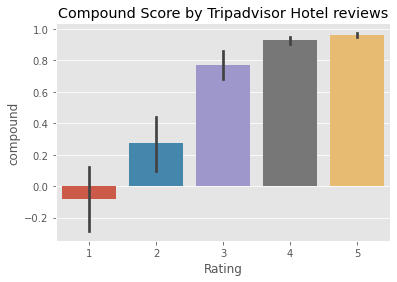

In [18]:
ax = sns.barplot(data=vaders, x='Rating', y='compound')
ax.set_title('Compound Score by Tripadvisor Hotel reviews')
plt.show()

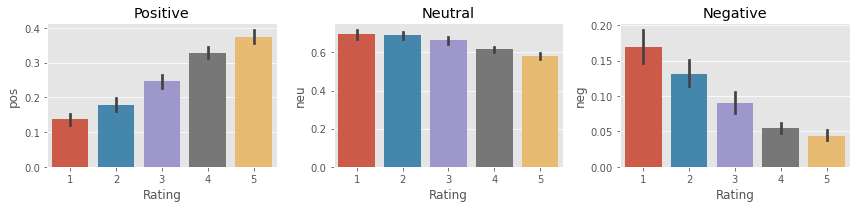

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## Roberta Pretrained Model

     Use a model trained of a large corpus of data.
     Transformer model accounts for the words but also the context related to other words.

In [20]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [21]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [22]:
# VADER results on example
print(example)
sia.polarity_scores(example)

excellent way stayed inn market memorial day weekend, room large great view water sure request way advance, hotel quiet fully booked crowded, service impeccable staff well-mannered friendly, ca n't fault anything.it great location right pike place market near lots great restaurants like etta chez shea,  


{'neg': 0.0, 'neu': 0.585, 'pos': 0.415, 'compound': 0.9782}

In [23]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0025270146, 'roberta_neu': 0.034785256, 'roberta_pos': 0.96268773}


In [24]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [25]:
model.config.vocab_size

50265

In [28]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        review = row['Review']
        myid = row['Id']
        vader_result = sia.polarity_scores(review)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(review)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 345
Broke for id 443
Broke for id 488


In [29]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [31]:
results_df

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Review,Rating
0,1,0.072,0.643,0.285,0.9747,0.019479,0.104080,0.876441,nice hotel expensive parking got good deal sta...,4
1,2,0.110,0.701,0.189,0.9787,0.587674,0.358500,0.053826,ok nothing special charge diamond member hilto...,2
2,3,0.081,0.700,0.219,0.9889,0.289251,0.548734,0.162015,nice rooms not 4* experience hotel monaco seat...,3
3,4,0.060,0.555,0.385,0.9912,0.003897,0.033762,0.962341,"unique, great stay, wonderful time hotel monac...",5
4,5,0.135,0.643,0.221,0.9797,0.073829,0.300111,0.626060,"great stay great stay, went seahawk game aweso...",5
...,...,...,...,...,...,...,...,...,...,...
492,496,0.038,0.747,0.215,0.8807,0.627298,0.316703,0.055999,questionable quality property wonderful ways r...,3
493,497,0.170,0.705,0.125,-0.3691,0.142851,0.378504,0.478645,luxurious pricey stay hilton purchased rooms h...,3
494,498,0.056,0.598,0.346,0.9872,0.009195,0.090651,0.900154,"cozy, maybe hotel bothered paid price stayed l...",4
495,499,0.029,0.682,0.289,0.9623,0.004093,0.054892,0.941015,great airport hotel prepaid rate hilton.com 84...,5


## Comparing Scores between Models


In [30]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Review', 'Rating'],
      dtype='object')

## Combine and Compare

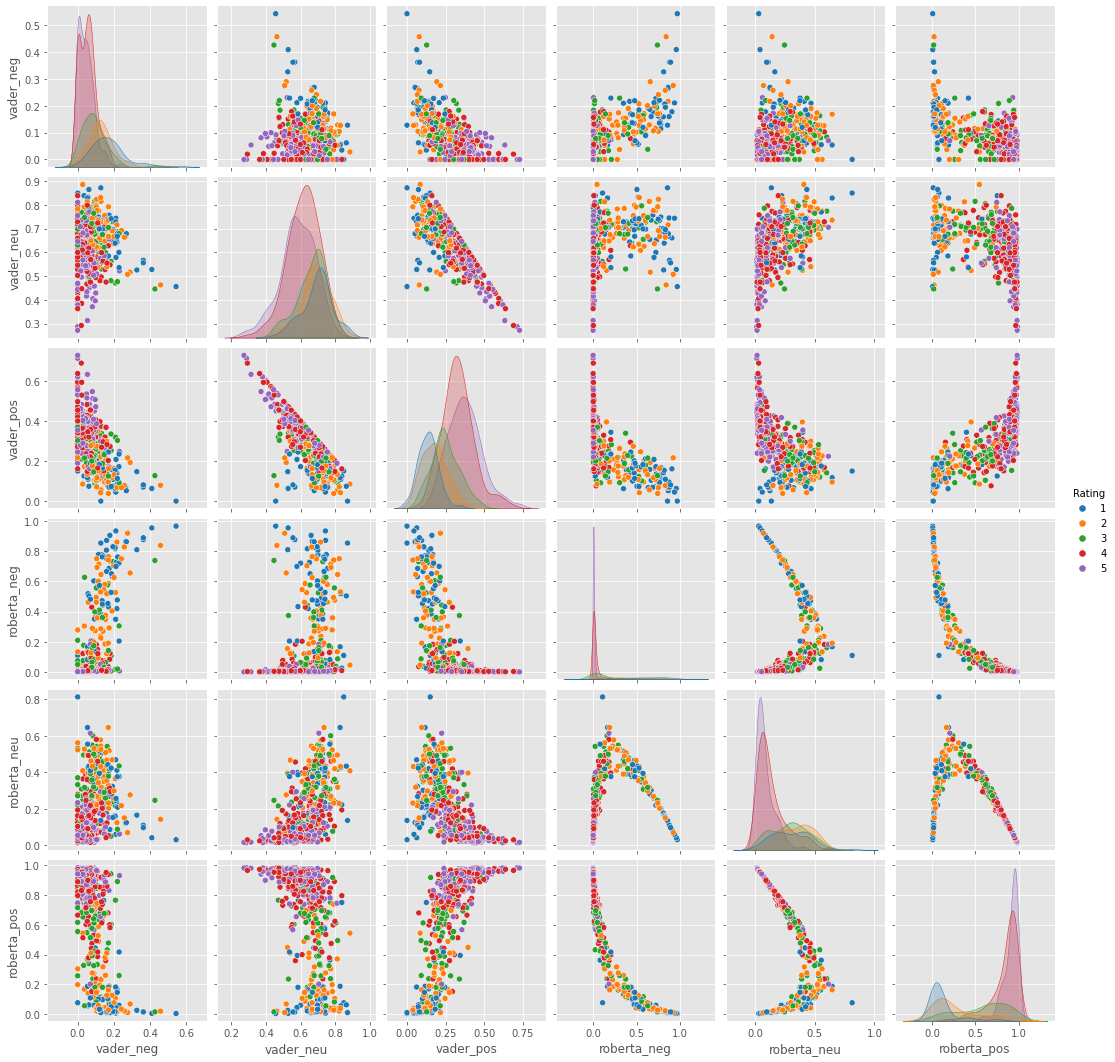

In [32]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Rating',
            palette='tab10')
plt.show()

## Review Examples:

    Positive 1-Star and Negative 5-Star Reviews
    some examples where the model scoring and review score differ the most

In [33]:
results_df.query('Rating == 1') \
    .sort_values('roberta_pos', ascending=False)['Review'].values[0]

'stay away dirty rooms stayed far better places seattle, room size prison cell window facing outside wall, quiet showered flushed toilet, plus seattle best coffee lobby right downtown, hotel limo expect pay 30 yellow cab, hotel staff helpful friendly,  '

In [34]:
results_df.query('Rating == 1') \
    .sort_values('vader_pos', ascending=False)['Review'].values[0]

"stay plenty nice hotels seattle, not, terrible stay bellman lost luggage phones did n't work dirty sheets letter manager answered acknowledged, better staying,  "

 negative sentiment 5-Star view

In [35]:
results_df.query('Rating == 5') \
    .sort_values('roberta_neg', ascending=False)['Review'].values[0]

"max-imum enjoyment, co-worker stayed hotel max semi-business trip decided share room save company dollars mindful watch company money, max high end price wise typically pay traveling pleasure competetive downtown seattle hotels priceline spoiled years 150 night like splurge, called ahead confirm late check double check set reserved room 2 beds a-ok. arrival greeted attentive desk clerk went looking bottled water, experiencing smooth check soon way 8th floor room, impressions room far larger expected, course seen room complaints regarding size norm reviews hotel, wardrobe plenty spacious taken particular note mentioned hang clothes angle room wardrobe question large clothes, downfall room non-smoking non-smoking floor clearly home guests realize cigarette smoke smells lingers, probably adjusted co-worker particularly sensative problem, attempted switch rooms informed hotel booked wait morning, effort rid room reek opened windows helped bit, beds laden white comforters/duvets loads pill

In [36]:
results_df.query('Rating == 5') \
    .sort_values('vader_neg', ascending=False)['Review'].values[0]

"great seattle location great downtown hotel, parking problem, read reviews hotel parking 35 overnite, parked block away convention center 18.short 6 block walk pike place market, n't miss excellent dinner hotel daily grill definitely stay,  "

## The Transformers Pipeline
    
    Quick & easy way to run sentiment predictions

In [37]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\huggingface_hub\file_download.py:127: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Admin\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [39]:
sent_pipeline('Iam loving sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.999848484992981}]

In [40]:
sent_pipeline('who are you?')

[{'label': 'NEGATIVE', 'score': 0.9952167272567749}]

In [41]:
sent_pipeline('The rasagulla i had was super bad')

[{'label': 'NEGATIVE', 'score': 0.9998161196708679}]

In [42]:
sent_pipeline(example)

[{'label': 'POSITIVE', 'score': 0.9994007349014282}]